This is my first attempt to model machine learning alogrithms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.src.metrics.metrics_utils import confusion_matrix
#matplotlib inline

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum().sort_values()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [8]:
print(y.value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


### Model Selection with 6 folds

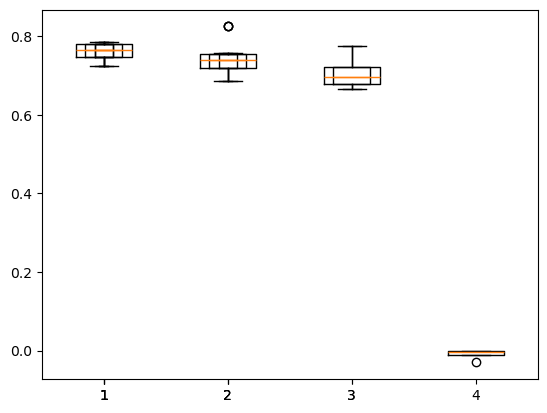

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold,cross_val_score
models={"LR":LogisticRegression(),"knn":KNeighborsClassifier(),"tree":DecisionTreeClassifier(),"lasso":Lasso()}
results=[]
for model in models.values():
    kf=KFold(n_splits=6,random_state=10,shuffle=True)
    cv_results=cross_val_score(model,X_train_scaled,y_train,cv=kf)
    results.append(cv_results)
    plt.boxplot(results)
    
    
    


Lets test it on test data

In [13]:
for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    test_score=model.score(X_test_scaled,y_test)
    print(f"The name of the model is {name} and accuracy is {test_score}")

The name of the model is LR and accuracy is 0.7532467532467533
The name of the model is knn and accuracy is 0.6948051948051948
The name of the model is tree and accuracy is 0.7662337662337663
The name of the model is lasso and accuracy is -0.00045647404452320295


We see that Logistic Regression performs best with 79% of train accuracy and 75% of test accuracy.<br>
Lets do Hyperparameter Tuning

In [15]:
params={"penalty":["l1","l2"],
        "C":np.linspace(0.1,10,10),
        "solver":["liblinear","saga","saga"],
        "class_weight":["balanced",{0:0.8,1:0.2}]
        }  



In [16]:
from sklearn.model_selection import RandomizedSearchCV
lr1=LogisticRegression()
kf1=KFold(n_splits=6,random_state=10,shuffle=True)
tuning=RandomizedSearchCV(lr1,param_distributions=params,cv=kf1,n_jobs=-1)
tuning.fit(X_train_scaled,y_train)
y_pred=tuning.predict(X_test_scaled)

In [17]:
print(tuning.best_params_)
print(tuning.best_score_)

{'solver': 'saga', 'penalty': 'l1', 'class_weight': 'balanced', 'C': 8.9}
0.7572339615457834


In [20]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[68 31]
 [16 39]]
              precision    recall  f1-score   support

           0       0.81      0.69      0.74        99
           1       0.56      0.71      0.62        55

    accuracy                           0.69       154
   macro avg       0.68      0.70      0.68       154
weighted avg       0.72      0.69      0.70       154

